# MLP Breast Cancer Wisconsin
Based on the Breast Cancer Wisconsin (Diagnostic) Dataset, a Multilayer Perceptron (MLP) model is developed using the PyTorch library to predict whether breast cancer cells are benign or malignant.

### 1) Imports

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

### 2) Load and visualize dataset

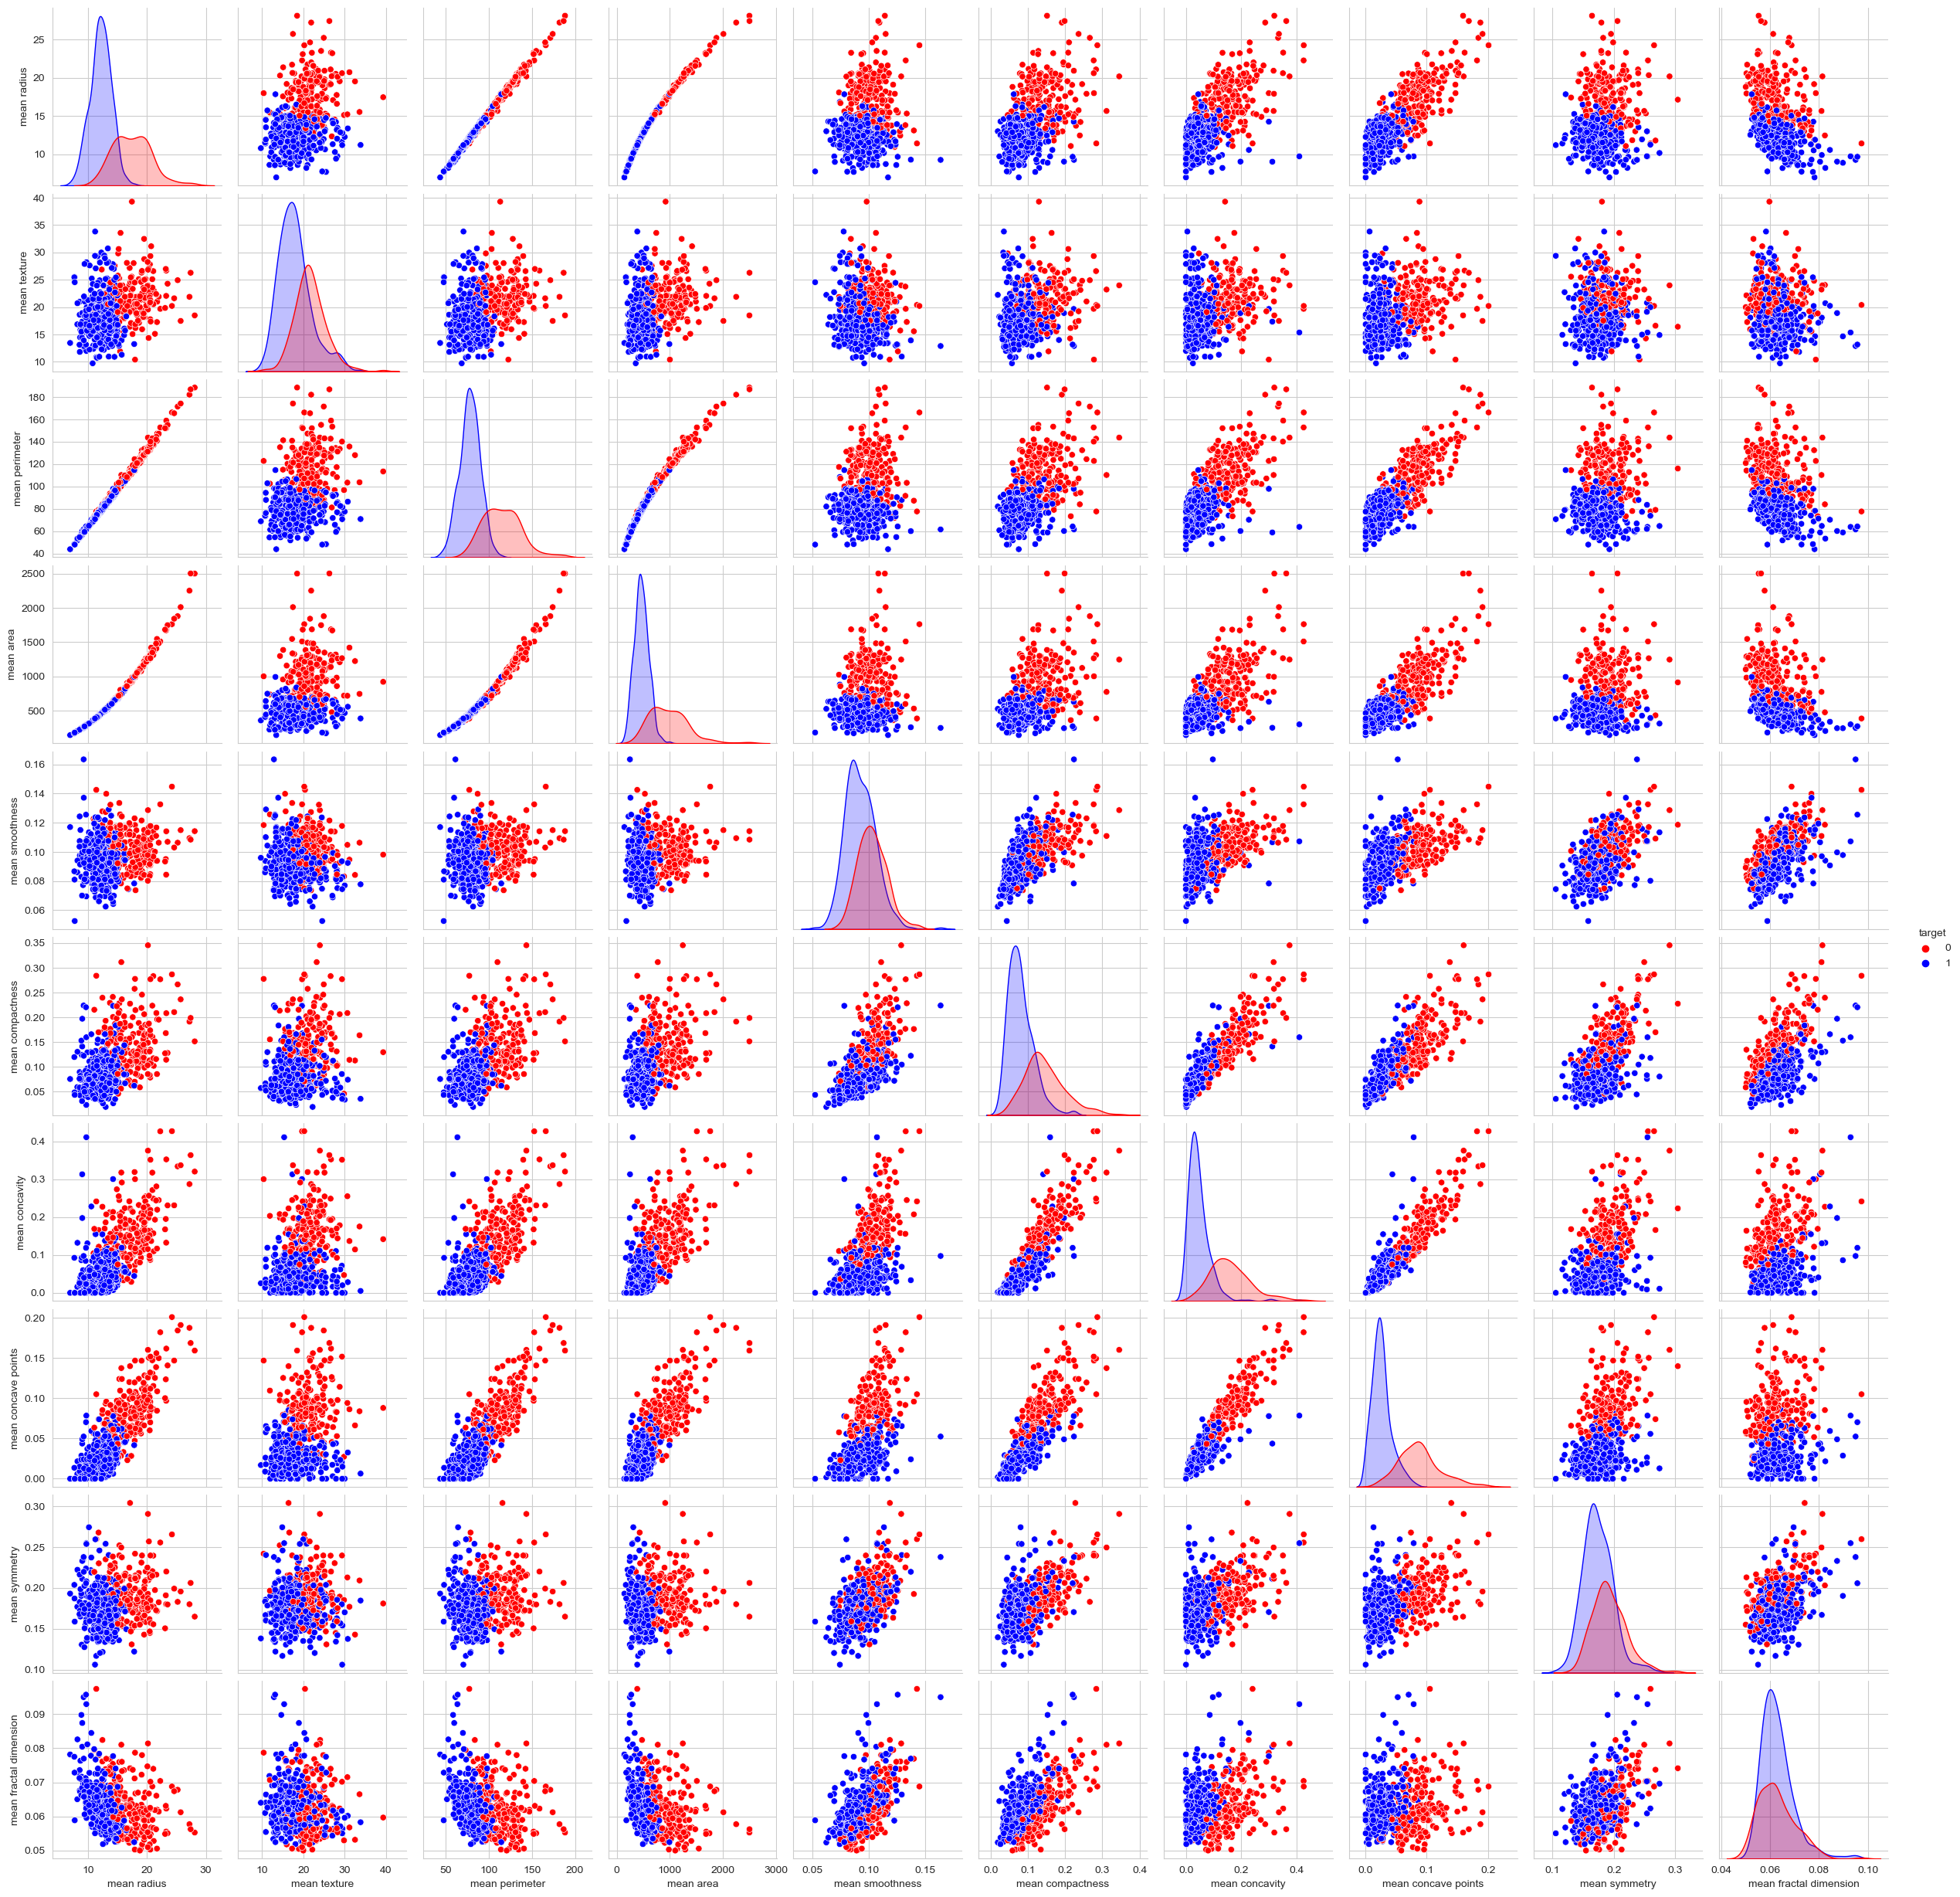

In [8]:
###########
# ANALYZE #
###########

# 569 samples
# targets/labels: 0 = malignant, 1 = benign
# 30 features: mean / standard error / worst


########
# LOAD #
########

breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
feature_names = breast_cancer.feature_names


#############
# VISUALIZE #
#############

colors = ['red', 'blue']

# pair plot of mean values
mean_values_df = pd.DataFrame(X[:, :10], columns=breast_cancer.feature_names[:10])
mean_values_df['target'] = y

sns.pairplot(mean_values_df, hue='target', kind='scatter', palette=colors)
plt.show()

### 3) Split trainings and test data

In [9]:
#########
# SPLIT #
#########

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use pytorch tensors to convert data
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

### 4) Create MLP Class

In [10]:
####################
# CLASS DEFINITION #
####################

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()

        self.layer1 = nn.Linear(input_size, hidden_size)  # map input layer size to hidden layer size
        self.layer2 = nn.Linear(hidden_size, hidden_size)  # map hidden layer size to hidden layer size
        self.output_layer = nn.Linear(hidden_size, num_classes)  # map hidden layer size to output layer size
        self.relu = nn.ReLU()


    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.output_layer(out)
        return out

### 5) Training and evaluation

In [11]:
############
# TRAINING #
############

# input_size --> 30 features
# num_classes --> 2 targets (0 or 1)
# hidden_size --> adapt individually

model = MLP(input_size=30, hidden_size=10, num_classes=2)
# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 50

train_losses = []

model.train()
for epoch in range(num_epochs):
    # get output
    outputs = model(X_train)
    # calculate loss for given output
    loss = criterion(outputs, y_train)
    train_losses.append(loss.item())
    # set the gradients to zero before the backpropagation
    optimizer.zero_grad()
    # backpropagation of the loss threw the layers
    loss.backward()
    # updates the model parameters
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]   - - -   Loss: {loss.item():.4f}')


##############
# EVALUATION #
##############

model.eval()

with torch.no_grad():
    # get outputs on test data
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)  # sets maximal value to 1

    correct = (predicted == y_test).sum().item()
    total = y_test.size(0)
    print(f'Model accuracy on the test dataset: {100 * correct / total:.2f}%')


Epoch [10/50]   - - -   Loss: 0.5572
Epoch [20/50]   - - -   Loss: 0.3410
Epoch [30/50]   - - -   Loss: 0.2711
Epoch [40/50]   - - -   Loss: 0.2495
Epoch [50/50]   - - -   Loss: 0.2382
Model accuracy on the test dataset: 93.86%


### 6) Visualization of trainings loss

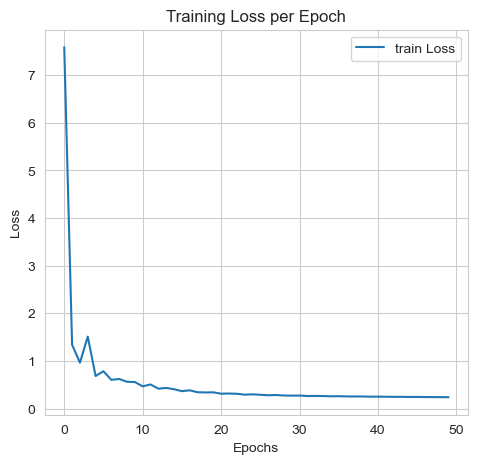

In [12]:
#############
# PLOT LOSS #
#############

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()